In [83]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [93]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/PAMAP_features.csv",index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [94]:
print(df["sub_id"].value_counts())
print(df["activity_id"].value_counts())
print(df["act_level"].value_counts())

5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: sub_id, dtype: int64
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: activity_id, dtype: int64
moderate    5283
light       5124
vigorous    1366
Name: act_level, dtype: int64


In [95]:
df.drop('sub_id',axis=1,inplace=True)
df.drop('activity_id',axis=1,inplace=True)
df["act_level"]=LabelEncoder().fit_transform(df["act_level"])
df

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,0.087374,1.634235,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,0.086820,3.379703,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,1.780491,3.100475,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,3.245008,6.196727,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [96]:
# 데이터 분류

X=df.drop('act_level',axis=1)
y=df['act_level']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

          hr_mean  hr_mean_normal    hr_std  hr_std_normal  hand_tmp_mean  \
3006    87.000000        1.175676  0.000000   7.105427e-15        34.3750   
3497   124.605469        1.683858  0.927920   1.253946e-02        31.8750   
14495  113.493430        1.891557  2.315888   3.859813e-02        32.5000   
13278   82.513672        1.375228  0.492657   8.210948e-03        33.8125   
14969   73.000000        1.106061  0.000000   7.327472e-15        34.4375   

       hand_tmp_std  hand_acc_x_mean  hand_acc_x_std  hand_acc_y_mean  \
3006            0.0        -1.165524        2.383779         3.381285   
3497            0.0       -12.040995        3.734766         3.069947   
14495           0.0        -3.723040       10.188184        11.705779   
13278           0.0        -3.618932        1.935690         0.542981   
14969           0.0        -9.275877        0.082824         1.006239   

       hand_acc_y_std  ...  ankle_acc_xz_cor  hand_gyr_xy_cor  \
3006         2.582771  ...       

In [97]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [105]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


--- Radom Forest ---
0.9972826086956522
[[1250    0    0]
 [   4 1338    0]
 [   0    4  348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1342
           2       1.00      0.99      0.99       352

    accuracy                           1.00      2944
   macro avg       1.00      1.00      1.00      2944
weighted avg       1.00      1.00      1.00      2944



In [106]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.9891304347826086
[[1245    5    0]
 [  10 1325    7]
 [   0   10  342]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1250
           1       0.99      0.99      0.99      1342
           2       0.98      0.97      0.98       352

    accuracy                           0.99      2944
   macro avg       0.99      0.98      0.99      2944
weighted avg       0.99      0.99      0.99      2944



In [107]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier ---
0.9911684782608695
[[1246    4    0]
 [   9 1328    5]
 [   0    8  344]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1250
           1       0.99      0.99      0.99      1342
           2       0.99      0.98      0.98       352

    accuracy                           0.99      2944
   macro avg       0.99      0.99      0.99      2944
weighted avg       0.99      0.99      0.99      2944



C:\Users\1563a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/PAMAP_features.csv",index_col=0)
#df["act_level"]=LabelEncoder().fit_transform(df["act_level"])
df["sub_id"]=LabelEncoder().fit_transform(df["sub_id"])
df["activity_id"]=LabelEncoder().fit_transform(df["activity_id"])
df["act_level"]=LabelEncoder().fit_transform(df["act_level"])
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [185]:
df.drop('sub_id',axis=1,inplace=True)
df.drop('act_level',axis=1,inplace=True)
df

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,10,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,3,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,4,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,10,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,2,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,1,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,0.087374,1.634235,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,1,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,0.086820,3.379703,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,3,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,1.780491,3.100475,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,6,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,3.245008,6.196727,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [186]:
X=df.drop('activity_id',axis=1).values
y = pd.get_dummies(df['activity_id']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)

print(X_train.shape)
print(y_train.shape)

(9418, 64)
(9418, 12)


In [187]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 12)             │           252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,822 (11.02 KB)

 Trainable params: 2,822 (11.02 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.4578 - loss: 2.3077 - val_accuracy: 0.7760 - val_loss: 0.5810
Epoch 2/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8353 - loss: 0.4327 - val_accuracy: 0.8928 - val_loss: 0.3727
Epoch 3/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9010 - loss: 0.3372 - val_accuracy: 0.9459 - val_loss: 0.1853
Epoch 4/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9480 - loss: 0.1791 - val_accuracy: 0.8949 - val_loss: 0.3899
Epoch 5/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.9482 - loss: 0.1657 - val_accuracy: 0.9437 - val_loss: 0.2014
Epoch 6/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.9486 - loss: 0.1683 - val_accuracy: 0.8068 - val_loss: 0.5902
Epoch 7/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9207 - loss: 0.2547 - val_accuracy: 0.9512 - val_loss: 0.1806
Epoch 8/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.9405 - loss: 0.2079 - 

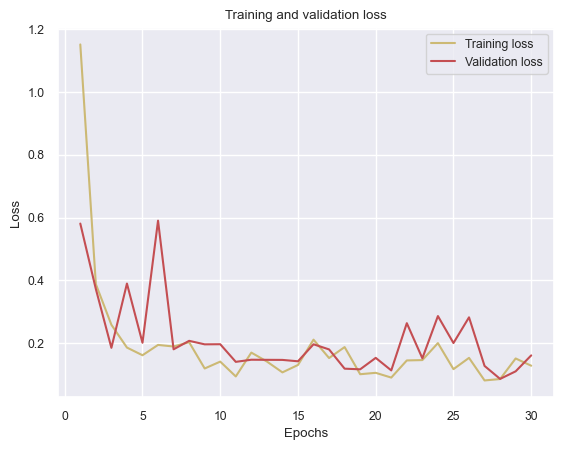

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [190]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       0.92      0.96      0.94       228
           2       0.84      0.99      0.91       272
           3       0.99      0.99      0.99       306
           4       0.97      1.00      0.98       116
           5       1.00      0.99      0.99       204
           6       0.99      1.00      0.99       239
           7       1.00      0.84      0.91        95
           8       0.92      0.97      0.94        79
           9       0.93      0.98      0.96       203
          10       0.99      0.81      0.89       328
          11       1.00      0.93      0.97        45

    accuracy                           0.96      2355
   macro avg       0.96      0.96      0.96      2355
weighted avg       0.96      0.96      0.96      2355

[[240   0   0   0   0   0   0   0   0   0   0   0]
 [  0 219   7   0   0   0   0   0   0   1   1   0]
 [  0   2 270   0   0   0   0  

In [298]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/shuttle-landing-control.data",header=None)
df.replace('*', 0, inplace=True)
df.columns =["Class","STABILITY","ERROR","SIGN","WIND","MAGNITUDE","VISIBILITY"]
df

,Class,STABILITY,ERROR,SIGN,WIND,MAGNITUDE,VISIBILITY
0,2,0,0,0,0,0,2
1,1,2,0,0,0,0,1
2,1,1,2,0,0,0,1
3,1,1,1,0,0,0,1
4,1,1,3,2,2,0,1
5,1,0,0,0,0,4,1
6,2,1,4,0,0,1,1
7,2,1,4,0,0,2,1
8,2,1,4,0,0,3,1
9,2,1,3,1,1,1,1


In [299]:
# 데이터 분류

X=df.drop('Class',axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

  STABILITY ERROR SIGN WIND MAGNITUDE  VISIBILITY
0         0     0    0    0         0           2
1         2     0    0    0         0           1
2         1     2    0    0         0           1
3         1     1    0    0         0           1
4         1     3    2    2         0           1
2    9
1    6
Name: Class, dtype: int64


In [300]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [301]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


--- Radom Forest ---
1.0
[[1 0]
 [0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [302]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.75
[[1 0]
 [1 2]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [303]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier ---
1.0
[[1 0]
 [0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [304]:
for i in df.columns:
    df[i]=np.array(df[i], dtype=np.float32)
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Class,STABILITY,ERROR,SIGN,WIND,MAGNITUDE,VISIBILITY
0,1,0,0,0,0,0,1
1,0,2,0,0,0,0,0
2,0,1,2,0,0,0,0
3,0,1,1,0,0,0,0
4,0,1,3,2,2,0,0
5,0,0,0,0,0,4,0
6,1,1,4,0,0,1,0
7,1,1,4,0,0,2,0
8,1,1,4,0,0,3,0
9,1,1,3,1,1,1,0


In [419]:
X=df.drop('Class',axis=1).values
y = pd.get_dummies(df['Class']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=12)

print(X_train.shape)
print(y_train.shape)

(10, 6)
(10, 2)


In [420]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_193 (Dense)               │ (None, 15)             │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 9)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 2)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

In [424]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8889 - loss: 0.2717 - val_accuracy: 1.0000 - val_loss: 0.5493
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8889 - loss: 0.2592 - val_accuracy: 1.0000 - val_loss: 0.5466
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8889 - loss: 0.2505 - val_accuracy: 1.0000 - val_loss: 0.5533
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8889 - loss: 0.2360 - val_accuracy: 1.0000 - val_loss: 0.5608
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8889 - loss: 0.2224 - val_accuracy: 1.0000 - val_loss: 0.5563
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8889 - loss: 0.2121 - val_accuracy: 1.0000 - val_loss: 0.5333
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8889 - loss: 0.2016 - val_accuracy: 1.0000 - val_loss: 0.4971
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8889 - loss: 0.1915 - val_accuracy: 1.0000 - val_loss: 0.4592


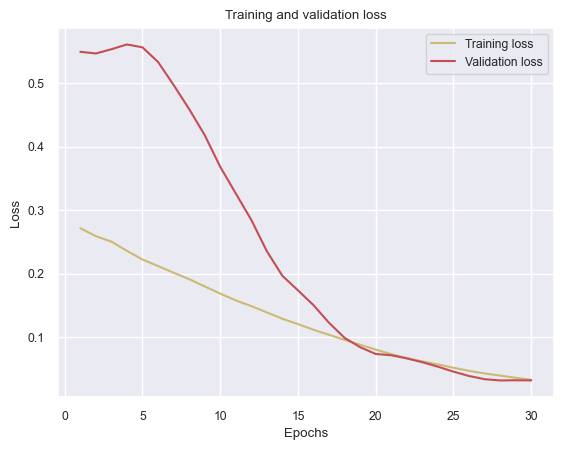

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [426]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[1 0]
 [0 4]]
